# Indirect reduction of confidence
Instead of directly educing the confidence in a probability distribution, this experiment attempts to indrectly reduce it in the process of mixing information from two probability distributions.

In [1]:
import random
import math
import matplotlib.pyplot as plt

# Create two populations


In [2]:
rng = [0, 100]
dlt = 0.05
n_samples = 300
samples1 = []
mean1 = (rng[1]-rng[0])*0.3
sigma1 = 10
samples2 = []
mean2 = (rng[1]-rng[0])*0.6
sigma2 = 12
for i in range(n_samples):
    samples1.append(random.gauss(mean1, sigma1))
    samples2.append(random.gauss(mean2, sigma2))

# Estimate the probability distributions

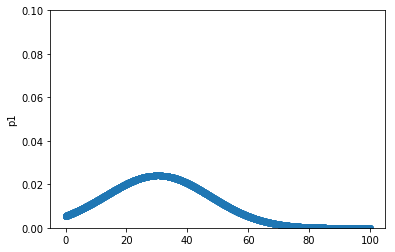

sum: 1.0000000000000033


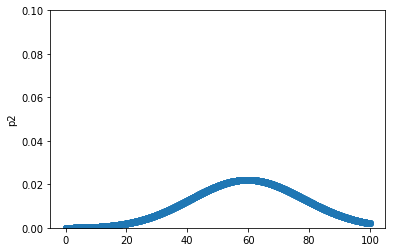

sum: 1.0000000000000009


In [3]:
sigma = 20
k = lambda x1, x2: math.exp(-(x1 - x2)**2/sigma/sigma)
N = int((rng[1]-rng[0])/dlt+1)
x_axis = [rng[0] + i * dlt for i in range(N)]
def estPDF(samples):
    x = rng[0]
    p = [0] * N
    for i in range(N):
        x = rng[0] + i * dlt
        for s in samples:
            p[i] += k(x, s)
    sum_p = sum(p) * dlt
    for i in range(len(p)):
        p[i] /= sum_p
    return p
def showPDF(p, title, ylim=None):
    plt.scatter(x_axis, p)
    plt.ylabel(title)
    if ylim != None:
        plt.ylim(0, ylim)
    plt.show()
    print('sum: ' + str(sum(p)*dlt))
p1 = estPDF(samples1)
showPDF(p1, 'p1', 0.1)
p2 = estPDF(samples2)
showPDF(p2, 'p2', 0.1)

# Create the mixture of samples based on $\omega$

Resample particles from the two populations

In [4]:
omega = 0.5
n2switch = int(n_samples * omega)
print('n2switch: ' + str(n2switch))
omega = n2switch / n_samples
print('adjusted omega: ' + str(omega))
samples_mix = samples1[n2switch:] + samples2[:n2switch]
random.shuffle(samples_mix)

n2switch: 150
adjusted omega: 0.5


Estimate the mixed distribution

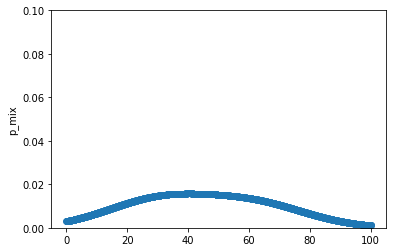

sum: 0.9999999999999981


In [5]:
p_mix = estPDF(samples_mix)
showPDF(p_mix, 'p_mix', 0.1)

# Covariance Intersection of $p_1$ and $p_2$

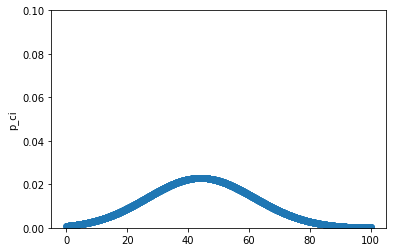

sum: 0.9999999999999991


In [6]:
p_ci = [0] * len(p1)
for i in range(len(p_ci)):
    p_ci[i] = math.pow(p1[i], 1 - omega) * math.pow(p2[i], omega)
p_ci_sum = sum(p_ci) * dlt
for i in range(len(p_ci)):
    p_ci[i] /= p_ci_sum
showPDF(p_ci, 'p_ci', 0.1)

---
# Product of $p_1$ and $p_2$?

Calculate weights of particles in $p_1$ based on $p_2$

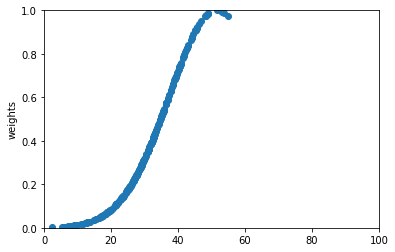

In [7]:
weights = [0] * n_samples
for i in range(n_samples):
    for j in range(n_samples):
        weights[i] = k(samples1[i], samples2[j])
weight_sum = sum(weights)
plt.scatter(samples1, weights)
plt.ylabel('weights')
plt.ylim(0, 1)
plt.xlim(rng[0], rng[1])
plt.show()

Resampling by the weights

In [8]:
samples_prod = [0] * n_samples
for i in range(n_samples):
    r = random.uniform(0.0, weight_sum)
    temp = 0
    for j in range(n_samples):
        temp += weights[j]
        if r <= temp or j == n_samples - 1:
            samples_prod[i] = samples1[j]
            break

estimate the distribution

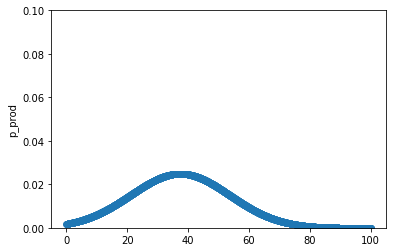

sum: 1.000000000000002


In [9]:
p_prod = estPDF(samples_prod)
showPDF(p_prod, 'p_prod', 0.1)

# Naive way of product

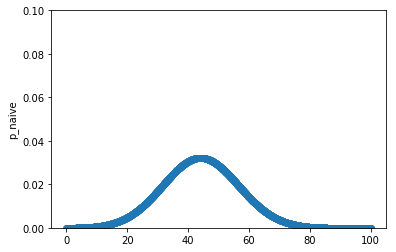

sum: 0.9999999999999947


In [10]:
p_naive = [0] * len(p1)
for i in range(len(p_naive)):
    p_naive[i] = p1[i] * p2[i]
p_naive_sum = sum(p_naive) * dlt
for i in range(len(p_naive)):
    p_naive[i] /= p_naive_sum
showPDF(p_naive, 'p_naive', 0.1)